# Изучение сезонности продаж. Тестовое задание от торговой компании.

Импорт необходимых библиотек

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

## Задание 1
В таблице `task1.xlsx` представлены количественные показатели продаж Модели №1. Посчитайте коэффициент сезонности

Загрузка и изучение данных

In [2]:
df1 = pd.read_excel('task1.xlsx', index_col = '№')
df1

,янв,фев,мар,апр,май,июн,июл,авг,сен,окт,ноя,дек
№,,,,,,,,,,,,
Модель 1,156,154,507,433,743,1742,2281,1000,429,262,150,250


In [3]:
#Транспонирование таблицы
df1_tr = df1.stack().reset_index(name="val").drop(columns="№").rename(columns={"level_1":"month"})

#Расчёт и добавление коэффициента сезонности
df1_tr['season_factor'] = round(df1_tr['val'] / df1_tr['val'].mean(), 2)
df1_tr

,month,val,season_factor
0,янв,156,0.23
1,фев,154,0.23
2,мар,507,0.75
3,апр,433,0.64
4,май,743,1.10
5,июн,1742,2.58
6,июл,2281,3.38
7,авг,1000,1.48
8,сен,429,0.64
9,окт,262,0.39


### Вывод
- таблица прочитана и транспонирована
- коэффициент сезонности расчитан и внесён в колонку `season_factor`

## Задание 2
В таблице `task2.xlsx` содержатся результаты продаж в разрезе клиентской базы
<br>Необходимо:
   1. присвоить статус клиентам по АВС-анализу (критерии групп разработать самостоятельно);
   2. посчитать суммарный объём продаж по каждому клиенту;
   3. используя формулу, подсчитать суммарный объем реализации ежемесячно и по итогам года

In [4]:
df2 = pd.read_excel('task2.xlsx')
df2.head()

,Статус,Клиент,янв,фев,мар,апр,май,июн,июл,авг,сен,окт,ноя,дек,Итого год
0,Итого,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Активис,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,739820.0,226520.0,NaN
2,NaN,Виндэс,0.0,0.0,0.0,0.0,0.0,51960.0,0.0,201780.0,380660.0,0.0,0.0,0.0,NaN
3,NaN,Гера,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126000.0,0.0,0.0,NaN
4,NaN,Гефест,517160.0,343360.0,816980.0,375600.0,0.0,771600.0,961500.0,1367300.0,2175920.0,1280680.0,914780.0,809620.0,NaN


In [5]:
#Суммарный объём продаж по каждому клиенту в столбец `Итого год`
df2['Итого год'] = df2.loc[1:, 'янв': 'дек'].sum(axis=1)

#Суммарный объём продаж ежемесячно и по итогам года
df2.loc[0, 'янв': 'Итого год'] = df2.loc[1:, 'янв': 'Итого год'].sum(axis=0)
df2.head()

,Статус,Клиент,янв,фев,мар,апр,май,июн,июл,авг,сен,окт,ноя,дек,Итого год
0,Итого,NaN,1662960.0,976240.0,1834740.0,2323740.0,1236880.0,3108870.0,7734270.0,2646170.0,6577630.0,2890380.0,3931980.0,2905020.0,37828880.0
1,NaN,Активис,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,739820.0,226520.0,966340.0
2,NaN,Виндэс,0.0,0.0,0.0,0.0,0.0,51960.0,0.0,201780.0,380660.0,0.0,0.0,0.0,634400.0
3,NaN,Гера,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126000.0,0.0,0.0,126000.0
4,NaN,Гефест,517160.0,343360.0,816980.0,375600.0,0.0,771600.0,961500.0,1367300.0,2175920.0,1280680.0,914780.0,809620.0,10334500.0


Присвоение статуса клиентам по ABC-анализу:
<br>А - если доля суммы продаж по клиенту за год в общей сумме продаж за год по всем клиентам от 10% и более,
<br>В - если доля суммы продаж по клиенту за год в общей сумме продаж за год по всем клиентам от 1% до 10%,
<br>С - если доля суммы продаж по клиенту за год в общей сумме продаж за год по всем клиентам менее 1%

In [6]:
def client_category(ratio):
    if ratio >= 0.1:
        return 'A'
    elif ratio >= 0.01:
        return 'B'
    else:
        return 'C'

In [7]:
df2['ratio'] = round(df2['Итого год'][1:] / df2['Итого год'][1:].sum(), 2)
df2['Статус'][1:] = df2['ratio'][1:].apply(client_category)
df2 = df2.drop('ratio', axis=1)
df2.head()

,Статус,Клиент,янв,фев,мар,апр,май,июн,июл,авг,сен,окт,ноя,дек,Итого год
0,Итого,NaN,1662960.0,976240.0,1834740.0,2323740.0,1236880.0,3108870.0,7734270.0,2646170.0,6577630.0,2890380.0,3931980.0,2905020.0,37828880.0
1,B,Активис,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,739820.0,226520.0,966340.0
2,B,Виндэс,0.0,0.0,0.0,0.0,0.0,51960.0,0.0,201780.0,380660.0,0.0,0.0,0.0,634400.0
3,C,Гера,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126000.0,0.0,0.0,126000.0
4,A,Гефест,517160.0,343360.0,816980.0,375600.0,0.0,771600.0,961500.0,1367300.0,2175920.0,1280680.0,914780.0,809620.0,10334500.0


Распределение прибыли по клиентам

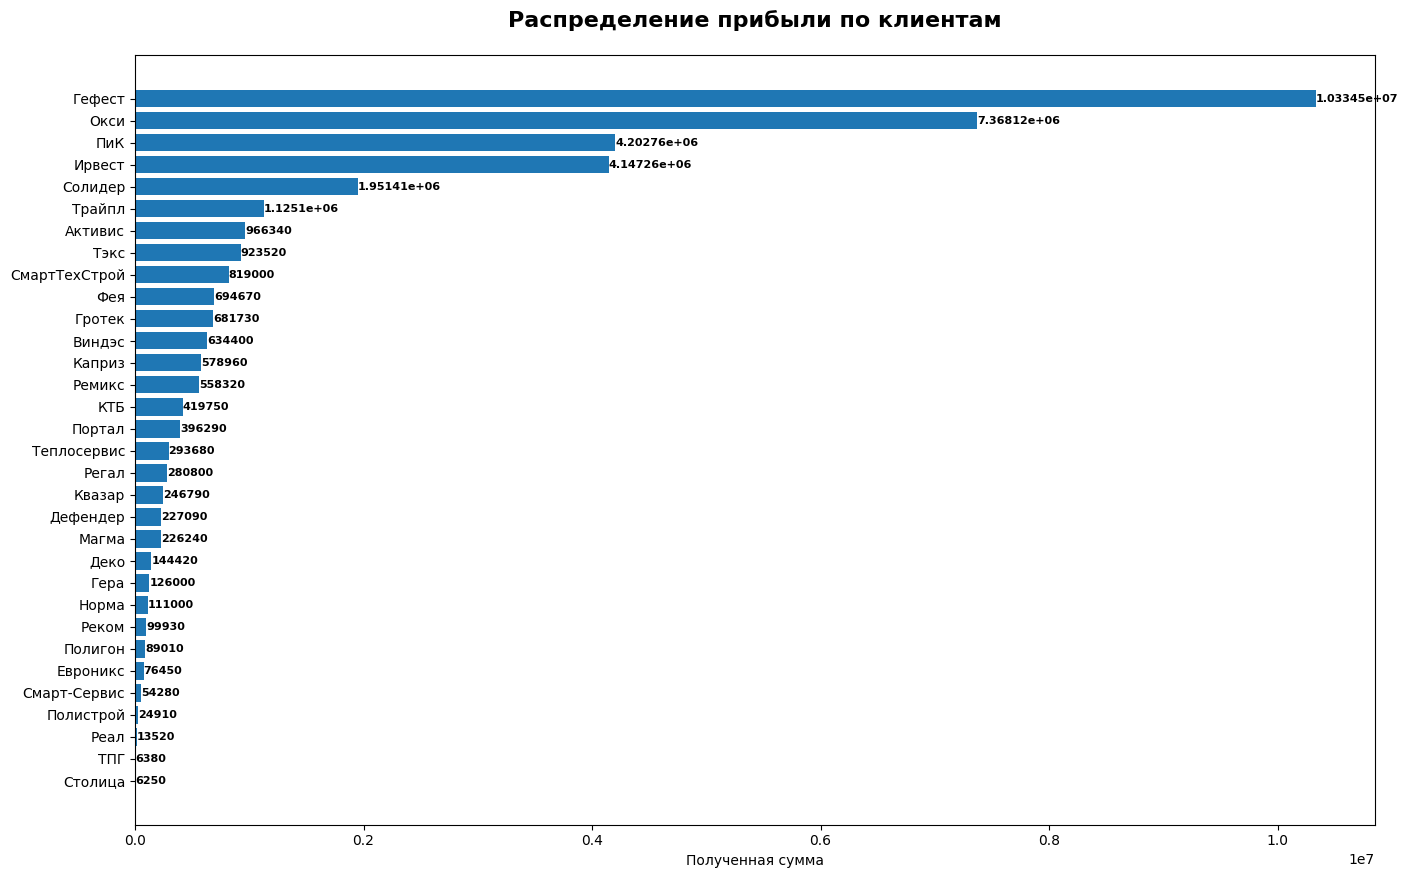

In [8]:
#сортировка датафрейма по суммам
df2_sort = df2.sort_values(by='Итого год', ascending=True)

#создание диаграммы, горизонтальное расположение
fig, ax = plt.subplots(figsize=(16,10))

#размещение данных по осям
bars = plt.barh(df2_sort['Клиент'][:32], df2_sort['Итого год'][:32], height=0.8)

#установка заголовка
ax.set_title('Распределение прибыли по клиентам', fontsize=16, 
              fontweight='bold', pad=20)
#создание подписей (меток) данных
ax.bar_label(bars, padding=0, color='black', 
             fontsize=8, label_type='edge', #fmt='%.1f%%',
            fontweight='bold')

plt.xlabel('Полученная сумма', fontsize=10)
plt.show()

Разделение клиентов по группам

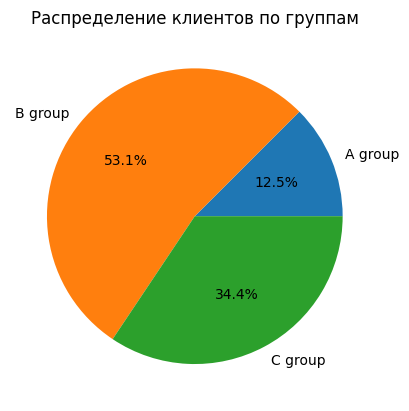

In [9]:
labels = 'A group', 'B group', 'C group'
sizes = (
    [df2.groupby('Статус')['Клиент'].count()[0], 
     df2.groupby('Статус')['Клиент'].count()[1], 
     df2.groupby('Статус')['Клиент'].count()[2]]
)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Распределение клиентов по группам')
plt.show()

### Вывод
- таблица прочитана
- посчитан суммарный объём продаж по каждому клиенту (в колонке `Итого год`)
- посчитан суммарный объем реализации ежемесячно и по итогам года (строка под индексом `0`)
- присвоен статус клиентам по АВС-анализу (в колонке `Статус`)
- изучено соотношение клиентов в группах (группа А - 12.5%, группа В - более половины, группа С - примерно третья часть)
- построена диаграмма распределения прибыли от клиентов

## Задание 3
<br>Средний товарооборот компании в месяц 500 000 руб. 
<br>Среднее количество проданного товара 500 штук. 
<br>Торговая наценка этого товара — 20 %. 
<br>На какую сумму компания должна продать товар, чтобы получить скидку в размере 5 или 7 %, 
<br>при условии, что компания для скидки 5 % хочет получить дополнительную прибыль в 2 000 руб., а для 7 % — 5 000 руб. 

In [10]:
#Объявление переменных
average_turnover_per_month = 500000
average_number_of_products_per_month = 500
trade_margin = 0.2
discount_5 = 0.05
add_profit_with_discount_5 = 2000
discount_7 = 0.07
add_profit_with_discount_7 = 5000

In [11]:
def sales_amount(average_turnover_per_month, discount, add_profit_with_discount):
    sales_amount_for_discount = round((average_turnover_per_month + add_profit_with_discount)/(1 - discount), 0)
    return sales_amount_for_discount

In [12]:
sales_amount_for_discount_5 = sales_amount(average_turnover_per_month,discount_5, add_profit_with_discount_5)
sales_amount_for_discount_7 = sales_amount(average_turnover_per_month,discount_7, add_profit_with_discount_7)
display('сумма продаж для предоставления скидки 5%:', sales_amount_for_discount_5)
display('сумма продаж для предоставления скидки 7%:', sales_amount_for_discount_7)

'сумма продаж для предоставления скидки 5%:'

528421.0

'сумма продаж для предоставления скидки 7%:'

543011.0

In [13]:
display('процент повышения суммы продаж для скидки 5%:', round(sales_amount_for_discount_5/average_turnover_per_month*100-100, 2))
display('процент повышения суммы продаж для скидки 7%:', round(sales_amount_for_discount_7/average_turnover_per_month*100-100, 2))

'процент повышения суммы продаж для скидки 5%:'

5.68

'процент повышения суммы продаж для скидки 7%:'

8.6

In [14]:
display('повышение продажной стоимости для одного товара при скидке 5%, руб:', 
        round((sales_amount_for_discount_5/average_number_of_products_per_month)-(average_turnover_per_month/average_number_of_products_per_month), 2))
display('повышение продажной стоимости для одного товара при скидке 7%, руб:', 
        round((sales_amount_for_discount_7/average_number_of_products_per_month)-(average_turnover_per_month/average_number_of_products_per_month), 2))

'повышение продажной стоимости для одного товара при скидке 5%, руб:'

56.84

'повышение продажной стоимости для одного товара при скидке 7%, руб:'

86.02

### Вывод
- посчитаны необходимые суммы продаж
    - для получения скидки 5% - 528421 руб.
    - для получения скидки 7% - 543011 руб.
- посчитаны необходимые увеличения цены за один товар
    - для получения скидки 5% - 56.84 руб.
    - для получения скидки 7% - 86.02 руб.

## Задание 4
По предоставленным данным в таблице `task4.xlsx` необходимо в целом по сети:

1. выявить наличие сезонности;
2. численно выразить сезонные колебания:
    1) метод абсолютных разностей;
    2) метод относительных разностей;
    3) индексный метод;
    4) методом скользящей средней;
    5) методом аналитического выравнивания;
    6) методом постоянной средней;
3. оценить последствия сезонных колебаний

In [15]:
#Чтение датафрейма
df4 = pd.read_excel('task4.xlsx')
df4.head()

,Период,Магазин 1,Магазин 2,Магазин 3,Магазин 4,Магазин 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016 год,1.595614e+08,8.522611e+07,6.461818e+07,8.171385e+07,1.031921e+08
2,Январь,1.198859e+07,7.320422e+06,5.128720e+06,7.461783e+06,8.397067e+06
3,Февраль,1.285317e+07,7.626497e+06,5.465839e+06,6.508588e+06,8.845062e+06
4,Март,1.416727e+07,7.636850e+06,5.681712e+06,6.652781e+06,9.291578e+06


In [16]:
#Добавление колонки с годом
df4['Год'] = df4['Период']
df4['Год'].loc[2:13] = 2016
df4['Год'].loc[15:26] = 2017
df4['Год'].loc[28:] = 2018

#Удаление лишних строк: пустая первая и промежуточные итоги по годам
df4 = df4.drop(labels=[0, 1, 14, 27], axis=0)

#Добавление продаж по сети в целом
df4['Сеть'] = df4.loc[:, 'Магазин 1':'Магазин 4'].sum(axis=1)
df4.head()

,Период,Магазин 1,Магазин 2,Магазин 3,Магазин 4,Магазин 5,Год,Сеть
2,Январь,1.198859e+07,7.320422e+06,5.128720e+06,7.461783e+06,8.397067e+06,2016,3.189951e+07
3,Февраль,1.285317e+07,7.626497e+06,5.465839e+06,6.508588e+06,8.845062e+06,2016,3.245410e+07
4,Март,1.416727e+07,7.636850e+06,5.681712e+06,6.652781e+06,9.291578e+06,2016,3.413861e+07
5,Апрель,1.392408e+07,7.673945e+06,5.576561e+06,6.776197e+06,9.372679e+06,2016,3.395078e+07
6,Май,1.232294e+07,6.826200e+06,8.121161e+06,1.210319e+07,7.746392e+06,2016,3.937349e+07


In [17]:
#Расчёт коэффициента сезонности
df4['Коэф.сез.'] = 0
df4_2016 = df4[df4['Год'] == 2016]
df4_2017 = df4[df4['Год'] == 2017]
df4_2018 = df4[df4['Год'] == 2018]

In [18]:
#Функция для расчёта коэффициента сезонности
def season_factor(df):
    df['Коэф.сез.'] = round(df['Сеть'] / df['Сеть'].mean(), 2)
    return df

In [19]:
#Применение функции
season_factor(df4_2016)
season_factor(df4_2017)
season_factor(df4_2018)
df4 = pd.concat([df4_2016, df4_2017, df4_2018])

In [20]:
#Замена буквенных обозначения периода числовыми
df4 = df4[['Год', 'Период', 'Магазин 1', 'Магазин 2', 'Магазин 3', 'Магазин 4', 'Магазин 5', 'Сеть', 'Коэф.сез.']]
df4['Период'] = (
    df4['Период']
    .replace(
        ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], 
        ['01.01', '01.02', '01.03', '01.04', '01.05', '01.06', '01.07', '01.08', '01.09', '01.10', '01.11', '01.12'])
)

#Объединение периода и года в одну колонку
df4['date'] = df4.apply(lambda row: row['Период'] + '.' + str(row['Год']), axis=1)

#Перевод новой колонки в формат `Datetime`
df4['date'] = pd.to_datetime(df4['date'], format='%d.%m.%Y')

#Установка даты индексом для проведения анализа по числовому ряду
df4=df4.set_index('date')

count    3.200000e+01
mean     3.375932e+07
std      4.454106e+06
min      2.490211e+07
25%      3.162711e+07
50%      3.398702e+07
75%      3.596669e+07
max      4.361884e+07
Name: Сеть, dtype: float64

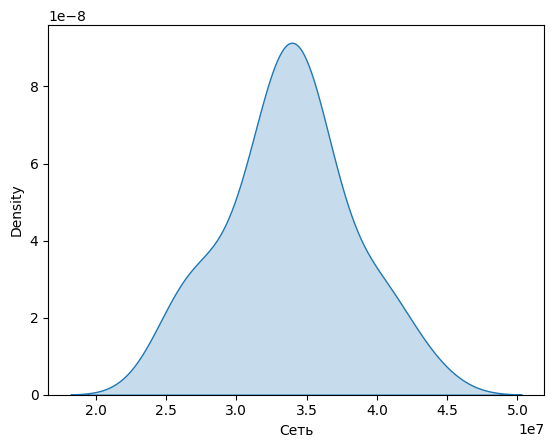

In [21]:
#Распределение сумм по времени
display(df4['Сеть'].describe())
sns.kdeplot(df4, x='Сеть', fill=True);

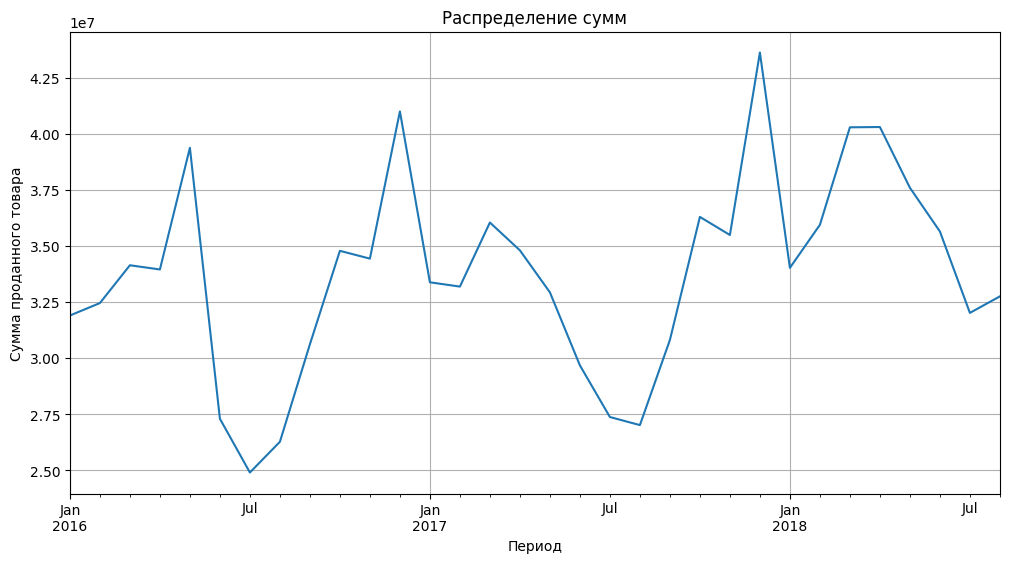

In [22]:
#Распределение сумм по датам
df4['Сеть'].plot(figsize=(12,6));
plt.title("Распределение сумм")
plt.xlabel("Период")
plt.ylabel("Сумма проданного товара")
plt.grid();

In [23]:
#Скользящее среднее
df4['mean'] = df4['Сеть'].rolling(15).mean()

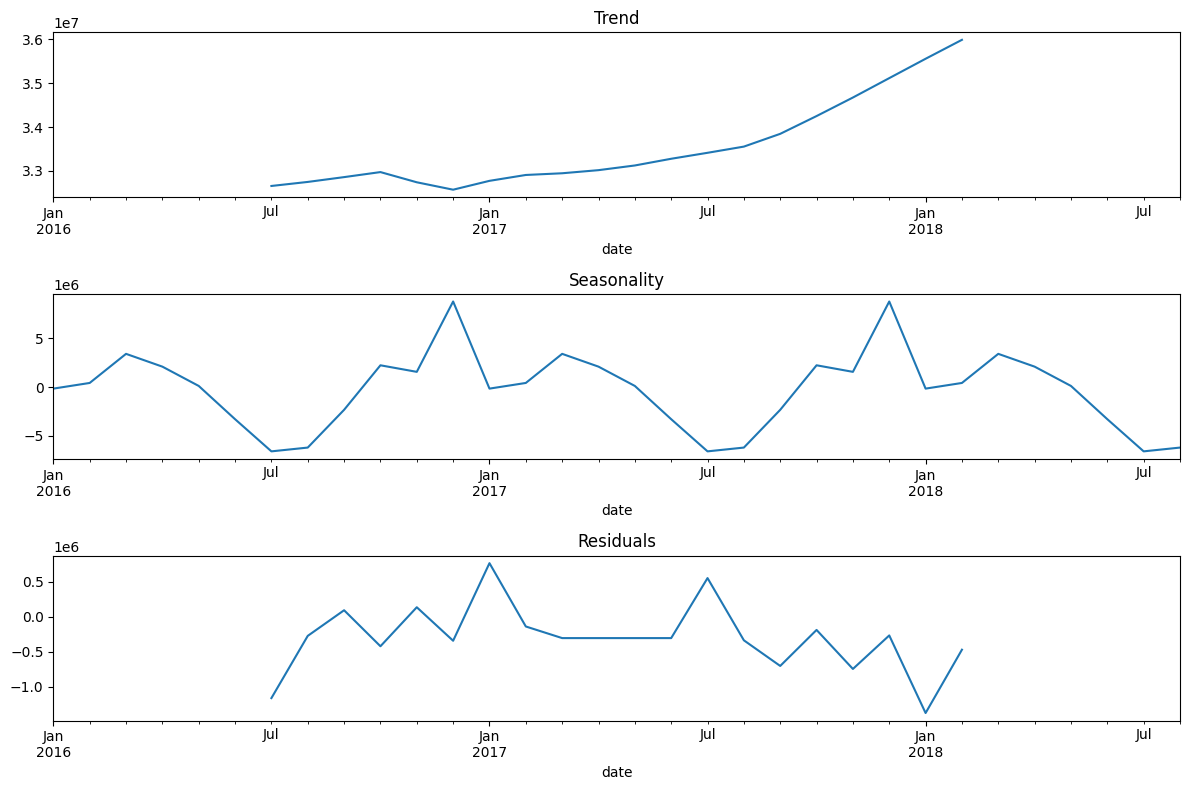

In [24]:
#Изучение тренда и сезонности
decomposed_units = seasonal_decompose(df4['Сеть'])

plt.figure(figsize=(12,8))
plt.subplot(311)

decomposed_units.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_units.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_units.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

### Вывод
- посчитан коэффициент сезонности: он говорит о сезонном росте в декабре и снижении в июле
- датасет преобразован в числовой ряд
- распределение прибыли близко к нормальному
- график тренда свидетельствует об общем росте прибыли
- на графике сезонности отчётливо наблюдается спад продаж в летние месяцы с минимумом в июле
- рост продаж начинается осенью и продолжается до новогодних праздников с пиком в декабре